<a href="https://colab.research.google.com/github/tasosnikitakis/Data_Science_Notebooks/blob/main/pharmacy_sales_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [1]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 22.5 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.7
    Uninstalling Werkzeug-2.3.7:
      Successfully uninstalled Werkzeug-2.3.7


In [2]:
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
from dash.exceptions import PreventUpdate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as ptx
import plotly.graph_objects as go

#Dataframes Creation

In [3]:
sales_df = pd.read_excel("/content/drive/MyDrive/pharmacy_data/Sales Data Current.xlsx")

In [4]:
sales_df.head()

,DATE,Z,ΠΕΛΑΤΕΣ
0,03/01/2020,619.33,54
1,07/01/2020,585.32,44
2,08/01/2020,377.37,31
3,09/01/2020,498.73,40
4,10/01/2020,484.16,40


#Data Exploration

In [5]:
sales_df.describe()

,Z,ΠΕΛΑΤΕΣ
count,873.000000,873.000000
mean,373.564800,27.668958
std,168.934585,10.162968
min,4.350000,2.000000
25%,256.960000,21.000000
50%,346.980000,27.000000
75%,478.350000,34.000000
max,1230.860000,73.000000


In [6]:
sales_df.columns

Index(['DATE', 'Z', 'ΠΕΛΑΤΕΣ'], dtype='object')

In [7]:
sales_df.Z.min()

4.35

In [8]:
sales_df.Z.max()

1230.86

#Data Cleaning

In [9]:
sales_df.rename(columns = {'Z':'Cash_Revenue', 'ΠΕΛΑΤΕΣ':'Sales'}, inplace = True)

In [10]:
sales_df.columns

Index(['DATE', 'Cash_Revenue', 'Sales'], dtype='object')

In [11]:
sales_df.head()

,DATE,Cash_Revenue,Sales
0,03/01/2020,619.33,54
1,07/01/2020,585.32,44
2,08/01/2020,377.37,31
3,09/01/2020,498.73,40
4,10/01/2020,484.16,40


##Date column string to datetime conversion

In [12]:
sales_df.DATE = pd.to_datetime(sales_df.DATE, format="%d/%m/%Y")
sales_df.style.format({"DATE": lambda t: t.strftime("%d/%m/%Y")})

,DATE,Cash_Revenue,Sales
0,03/01/2020,619.330000,54
1,07/01/2020,585.320000,44
2,08/01/2020,377.370000,31
3,09/01/2020,498.730000,40
4,10/01/2020,484.160000,40
5,13/01/2020,549.150000,38
6,14/01/2020,550.400000,43
7,15/01/2020,399.100000,28
8,16/01/2020,432.560000,35
9,17/01/2020,601.100000,40


In [51]:
# Assuming 'DATE' is a string, let's convert it to datetime for better handling
sales_df['DATE'] = pd.to_datetime(sales_df['DATE'], format='%d/%m/%Y')

# Extract the month and year from the 'DATE' column
sales_df['Year'] = sales_df['DATE'].dt.year
sales_df['Month'] = sales_df['DATE'].dt.month

# Group by year and month, and calculate the sum of Cash_Revenue and Sales
monthly_df = sales_df.groupby(['Year', 'Month'])[['Cash_Revenue', 'Sales']].sum().reset_index()

# Add a new column 'DATE' for the month and year
monthly_df['DATE'] = pd.to_datetime(monthly_df[['Year', 'Month']].assign(day=1))

# Rearrange the columns
monthly_df = monthly_df[['DATE', 'Cash_Revenue', 'Sales']]

# Drop the 'Year' and 'Month' columns
#monthly_df = monthly_df.drop(columns=['Year', 'Month'])

# Format the 'DATE' column to 'day/month/year' format
monthly_df['DATE'] = monthly_df['DATE'].dt.strftime('%d/%m/%Y')

# Print or display the resulting monthly_df
print(monthly_df)


          DATE  Cash_Revenue  Sales
0   01/01/2020      10161.42    801
1   01/02/2020      10153.49    839
2   01/03/2020      12745.35    842
3   01/04/2020      11128.81    707
4   01/05/2020       9291.81    657
5   01/06/2020       8580.12    668
6   01/07/2020       9405.81    674
7   01/08/2020       3735.62    281
8   01/09/2020       6576.78    548
9   01/10/2020       8132.53    660
10  01/11/2020       7380.13    574
11  01/12/2020       8861.23    660
12  01/01/2021       7064.51    531
13  01/02/2021       7430.69    547
14  01/03/2021       7442.44    605
15  01/04/2021       7724.28    565
16  01/05/2021       5637.43    484
17  01/06/2021       6769.17    530
18  01/07/2021       7078.08    549
19  01/08/2021       2823.33    201
20  01/09/2021       6428.08    497
21  01/10/2021       6092.42    498
22  01/11/2021       7155.86    558
23  01/12/2021       8030.55    595
24  01/01/2022       6690.28    487
25  01/02/2022       7904.78    560
26  01/03/2022       8480.53

In [52]:
monthly_df

,DATE,Cash_Revenue,Sales
0,01/01/2020,10161.42,801
1,01/02/2020,10153.49,839
2,01/03/2020,12745.35,842
3,01/04/2020,11128.81,707
4,01/05/2020,9291.81,657
5,01/06/2020,8580.12,668
6,01/07/2020,9405.81,674
7,01/08/2020,3735.62,281
8,01/09/2020,6576.78,548
9,01/10/2020,8132.53,660


In [64]:
# Assuming 'DATE' is a string, let's convert it to datetime for better handling
sales_df['DATE'] = pd.to_datetime(sales_df['DATE'], format='%d/%m/%Y')

# Extract the month and year from the 'DATE' column
sales_df['Year'] = sales_df['DATE'].dt.year
sales_df['Month'] = sales_df['DATE'].dt.month

# Group by year and month, and calculate the sum of Cash_Revenue and Sales
monthly_means_df = sales_df.groupby(['Year', 'Month'])[['Cash_Revenue', 'Sales']].mean().reset_index()

# Add a new column 'DATE' for the month and year
monthly_means_df['DATE'] = pd.to_datetime(monthly_means_df[['Year', 'Month']].assign(day=1))

# Rearrange the columns
monthly_means_df = monthly_means_df[['DATE', 'Cash_Revenue', 'Sales']]

# Drop the 'Year' and 'Month' columns
#monthly_df = monthly_df.drop(columns=['Year', 'Month'])

# Format the 'DATE' column to 'day/month/year' format
monthly_means_df['DATE'] = monthly_means_df['DATE'].dt.strftime('%d/%m/%Y')

# Round the columns to integers
monthly_means_df['Cash_Revenue'] = monthly_means_df['Cash_Revenue'].round().astype(int)
monthly_means_df['Sales'] = monthly_means_df['Sales'].round().astype(int)

# Print or display the resulting monthly_df
print(monthly_means_df)

          DATE  Cash_Revenue  Sales
0   01/01/2020           508     40
1   01/02/2020           508     42
2   01/03/2020           637     42
3   01/04/2020           556     35
4   01/05/2020           465     33
5   01/06/2020           409     32
6   01/07/2020           409     29
7   01/08/2020           340     26
8   01/09/2020           313     26
9   01/10/2020           370     30
10  01/11/2020           351     27
11  01/12/2020           403     30
12  01/01/2021           372     28
13  01/02/2021           391     29
14  01/03/2021           354     29
15  01/04/2021           351     26
16  01/05/2021           297     25
17  01/06/2021           322     25
18  01/07/2021           322     25
19  01/08/2021           314     22
20  01/09/2021           306     24
21  01/10/2021           305     25
22  01/11/2021           325     25
23  01/12/2021           349     26
24  01/01/2022           372     27
25  01/02/2022           395     28
26  01/03/2022           404

In [65]:
monthly_means_df

,DATE,Cash_Revenue,Sales
0,01/01/2020,508,40
1,01/02/2020,508,42
2,01/03/2020,637,42
3,01/04/2020,556,35
4,01/05/2020,465,33
5,01/06/2020,409,32
6,01/07/2020,409,29
7,01/08/2020,340,26
8,01/09/2020,313,26
9,01/10/2020,370,30


In [54]:

# Assuming 'DATE' is a string, let's convert it to datetime for better handling
monthly_df['DATE'] = pd.to_datetime(monthly_df['DATE'], format='%d/%m/%Y')

# Extract the year from the 'DATE' column
monthly_df['Year'] = monthly_df['DATE'].dt.year

# Group by year, calculate the sum of Cash_Revenue and Sales,
# and divide by the number of unique months in each year
yearly_df = monthly_df.groupby('Year').agg({'Cash_Revenue': 'sum', 'Sales': 'sum', 'DATE': 'nunique'}).reset_index()

# Rename the columns for clarity
yearly_df = yearly_df.rename(columns={'DATE': 'Unique_Months'})

# Calculate the average Cash_Revenue and Sales per unique month
yearly_df['Avg_Cash_Revenue'] = yearly_df['Cash_Revenue'] / yearly_df['Unique_Months']
yearly_df['Avg_Sales'] = yearly_df['Sales'] / yearly_df['Unique_Months']

# Round the columns to integers
yearly_df['Cash_Revenue'] = yearly_df['Cash_Revenue'].round().astype(int)
yearly_df['Avg_Cash_Revenue'] = yearly_df['Avg_Cash_Revenue'].round().astype(int)
yearly_df['Avg_Sales'] = yearly_df['Avg_Sales'].round().astype(int)

# Print or display the resulting yearly_df
print(yearly_df)

   Year  Cash_Revenue  Sales  Unique_Months  Avg_Cash_Revenue  Avg_Sales
0  2020        106153   7911             12              8846        659
1  2021         79677   6160             12              6640        513
2  2022         83980   6280             12              6998        523
3  2023         56312   3804              8              7039        476


In [57]:
def calculate_yearly_means(df):
    # Assuming 'DATE' is a string, let's convert it to datetime for better handling
    df['DATE'] = pd.to_datetime(df['DATE'], format='%d/%m/%Y')

    # Extract the year from the 'DATE' column
    df['Year'] = df['DATE'].dt.year

    # Group by year and calculate the mean for Cash_Revenue and Sales
    yearly_means_df = df.groupby('Year')[['Cash_Revenue', 'Sales']].mean().reset_index()

    # Rename the columns for clarity
    yearly_means_df = yearly_means_df.rename(columns={'Cash_Revenue': 'Mean_Cash_Revenue', 'Sales': 'Mean_Sales'})

    # Round the columns to integers
    yearly_means_df['Mean_Cash_Revenue'] = yearly_means_df['Mean_Cash_Revenue'].round().astype(int)
    yearly_means_df['Mean_Sales'] = yearly_means_df['Mean_Sales'].round().astype(int)

    return yearly_means_df

In [60]:
yearly_means = calculate_yearly_means(sales_df)

In [61]:
yearly_means

,Year,Mean_Cash_Revenue,Mean_Sales
0,2020,440,33
1,2021,335,26
2,2022,348,26
3,2023,368,25


In [103]:
def calculate_yearly_sums(df):
    # Assuming 'DATE' is a string, let's convert it to datetime for better handling
    df['DATE'] = pd.to_datetime(df['DATE'], format='%d/%m/%Y')

    # Extract the year from the 'DATE' column
    df['Year'] = df['DATE'].dt.year

    # Group by year and calculate the mean for Cash_Revenue and Sales
    yearly_sums_df = df.groupby('Year')[['Cash_Revenue', 'Sales']].sum().reset_index()

    # Rename the columns for clarity
    yearly_sums_df = yearly_sums_df.rename(columns={'Cash_Revenue': 'Total_Cash_Revenue', 'Sales': 'Total_Sales'})

    # Round the columns to integers
    yearly_sums_df['Total_Cash_Revenue'] = yearly_sums_df['Total_Cash_Revenue'].round().astype(int)
    yearly_sums_df['Total_Sales'] = yearly_sums_df['Total_Sales'].round().astype(int)

    return yearly_sums_df

In [104]:
calculate_yearly_sums(sales_df)

,Year,Total_Cash_Revenue,Total_Sales
0,2020,106153,7911
1,2021,79677,6160
2,2022,83980,6280
3,2023,56312,3804


In [66]:
yearly_averages_scatter = ptx.scatter(
    yearly_means,
    x="Year",
    y="Mean_Cash_Revenue"
)

In [17]:
yearly_averages_scatter

In [110]:
def calculate_yearly_sum(df):
    # Group the DataFrame by year and calculate the average of 'Cash_Revenue' and 'Sales'
    yearly_avg_df = df.groupby(df['DATE'].dt.year).agg({
        'Cash_Revenue': lambda x: round(x.sum(), 2),
        'Sales': lambda x: round(x.sum())
    }).reset_index()

    # Rename the 'DATE' column to 'Year' for clarity
    #yearly_avg_df.rename(columns={'DATE': 'Year'}, inplace=True)

    return yearly_avg_df

# Call the function to calculate the yearly averages

# Print or use the 'yearly_averages' DataFrame as needed



In [111]:
yearly_sum = calculate_yearly_sum(sales_df)

In [112]:
yearly_sum

,DATE,Cash_Revenue,Sales
0,2020,106153.10,7911
1,2021,79676.84,6160
2,2022,83980.31,6280
3,2023,56311.82,3804


In [70]:
yearly_sum_scatter = ptx.scatter(
    yearly_sum,
    x="Year",
    y="Cash_Revenue"
)

In [71]:
yearly_sum_scatter

In [72]:
monthly_yearly_data = monthly_yearly_data.reset_index()
monthly_sum_scatter = ptx.scatter(
    monthly_yearly_data,
    x="DATE",
    y="Cash_Revenue"
)

In [75]:
monthly_sum_scatter

In [73]:
monthly_sum_line = ptx.line(
    monthly_yearly_data,
    x="DATE",
    y="Cash_Revenue"
)

In [74]:
monthly_sum_line

In [114]:
def calculate_growth_rate(df, column_name):
    # Sort the DataFrame by date
    df.sort_values('DATE', inplace=True)

    # Calculate the monthly growth rate
    df['Growth_Rate'] = (df[column_name].pct_change() * 100).round(2)

    return df

In [115]:
calculate_growth_rate(monthly_df, 'Cash_Revenue')

,DATE,Cash_Revenue,Sales,Year,Growth_Rate,Previous_Value,YoY_Change_Rate,Month,Previous_Year_Value
0,2020-01-01,10161.42,801,2020,NaN,NaN,NaN,1,NaN
1,2020-02-01,10153.49,839,2020,-0.08,10161.42,NaN,2,NaN
2,2020-03-01,12745.35,842,2020,25.53,10153.49,NaN,3,NaN
3,2020-04-01,11128.81,707,2020,-12.68,12745.35,NaN,4,NaN
4,2020-05-01,9291.81,657,2020,-16.51,11128.81,NaN,5,NaN
5,2020-06-01,8580.12,668,2020,-7.66,9291.81,NaN,6,NaN
6,2020-07-01,9405.81,674,2020,9.62,8580.12,NaN,7,NaN
7,2020-08-01,3735.62,281,2020,-60.28,9405.81,NaN,8,NaN
8,2020-09-01,6576.78,548,2020,76.06,3735.62,NaN,9,NaN
9,2020-10-01,8132.53,660,2020,23.66,6576.78,NaN,10,NaN


In [81]:
def growth_rate_with_previous_value(df, column_name):
    # Sort the DataFrame by date
    df.sort_values('DATE', inplace=True)

    # Calculate the monthly growth rate as a percentage rounded to two decimal places
    df['Growth_Rate'] = (df[column_name].pct_change() * 100).round(2)

    # Add a "Previous_Value" column to store the previous month's value
    df['Previous_Value'] = df[column_name].shift(1)

    return df

In [83]:
growth_rate_with_previous_value(monthly_df, 'Cash_Revenue')

,DATE,Cash_Revenue,Sales,Year,Growth_Rate,Previous_Value
0,2020-01-01,10161.42,801,2020,NaN,NaN
1,2020-02-01,10153.49,839,2020,-0.08,10161.42
2,2020-03-01,12745.35,842,2020,25.53,10153.49
3,2020-04-01,11128.81,707,2020,-12.68,12745.35
4,2020-05-01,9291.81,657,2020,-16.51,11128.81
5,2020-06-01,8580.12,668,2020,-7.66,9291.81
6,2020-07-01,9405.81,674,2020,9.62,8580.12
7,2020-08-01,3735.62,281,2020,-60.28,9405.81
8,2020-09-01,6576.78,548,2020,76.06,3735.62
9,2020-10-01,8132.53,660,2020,23.66,6576.78


In [84]:
growth_rate_with_previous_value(monthly_means_df, 'Cash_Revenue')

,DATE,Cash_Revenue,Sales,Growth_Rate,Previous_Value
0,01/01/2020,508,40,NaN,NaN
12,01/01/2021,372,28,-26.77,508.0
24,01/01/2022,372,27,0.00,372.0
36,01/01/2023,336,26,-9.68,372.0
1,01/02/2020,508,42,51.19,336.0
13,01/02/2021,391,29,-23.03,508.0
25,01/02/2022,395,28,1.02,391.0
37,01/02/2023,419,29,6.08,395.0
2,01/03/2020,637,42,52.03,419.0
14,01/03/2021,354,29,-44.43,637.0


In [95]:
import pandas as pd

def calculate_year_over_year_change_rate(df, column_name):
    # Assuming 'DATE' is a string, let's convert it to datetime for better handling
    df['DATE'] = pd.to_datetime(df['DATE'], format='%d/%m/%Y')

    # Extract the year and month from the 'DATE' column
    df['Year'] = df['DATE'].dt.year
    df['Month'] = df['DATE'].dt.month

    # Initialize a list to store the calculated YoY change rates
    yoy_change_rates = []

    # Iterate through the DataFrame rows
    for index, row in df.iterrows():
        current_year = row['Year']
        current_month = row['Month']
        current_value = row[column_name]

        # Check if there's a previous year in the DataFrame
        if current_year - 1 in df['Year'].values:
            # Get the previous year's value for the same month
            previous_year_value = df[(df['Year'] == current_year - 1) & (df['Month'] == current_month)][column_name].values[0]

            # Calculate the YoY change rate
            yoy_change_rate = ((current_value - previous_year_value) / previous_year_value) * 100
        else:
            # No previous year data, set the YoY change rate to NaN
            yoy_change_rate = None

        # Append the calculated YoY change rate to the list
        yoy_change_rates.append(yoy_change_rate)

    # Create a new column 'YoY_Change_Rate' in the DataFrame
    df['YoY_Change_Rate'] = yoy_change_rates

    return df


In [99]:
def calculate_year_over_year_change_rate(df, column_name):
    # Assuming 'DATE' is a string, let's convert it to datetime for better handling
    df['DATE'] = pd.to_datetime(df['DATE'], format='%d/%m/%Y')

    # Extract the year and month from the 'DATE' column
    df['Year'] = df['DATE'].dt.year
    df['Month'] = df['DATE'].dt.month

    # Initialize lists to store the calculated YoY change rates and previous year values
    yoy_change_rates = []
    previous_year_values = []

    # Iterate through the DataFrame rows
    for index, row in df.iterrows():
        current_year = row['Year']
        current_month = row['Month']
        current_value = row[column_name]

        # Check if there's a previous year in the DataFrame
        if current_year - 1 in df['Year'].values:
            # Get the previous year's value for the same month
            previous_year_value = df[(df['Year'] == current_year - 1) & (df['Month'] == current_month)][column_name].values[0]

            # Calculate the YoY change rate
            yoy_change_rate = ((current_value - previous_year_value) / previous_year_value) * 100

            # Round the YoY change rate to two decimal places
            yoy_change_rate = round(yoy_change_rate, 2)
        else:
            # No previous year data, set the YoY change rate to NaN
            yoy_change_rate = None
            previous_year_value = None

        # Append the calculated YoY change rate and previous year value to the respective lists
        yoy_change_rates.append(yoy_change_rate)
        previous_year_values.append(previous_year_value)

    # Create new columns 'YoY_Change_Rate' and 'Previous_Year_Value' in the DataFrame
    df['YoY_Change_Rate'] = yoy_change_rates
    df['Previous_Year_Value'] = previous_year_values

    return df

In [100]:
calculate_year_over_year_change_rate(monthly_df, 'Cash_Revenue')

,DATE,Cash_Revenue,Sales,Year,Growth_Rate,Previous_Value,YoY_Change_Rate,Month,Previous_Year_Value
0,2020-01-01,10161.42,801,2020,NaN,NaN,NaN,1,NaN
1,2020-02-01,10153.49,839,2020,-0.08,10161.42,NaN,2,NaN
2,2020-03-01,12745.35,842,2020,25.53,10153.49,NaN,3,NaN
3,2020-04-01,11128.81,707,2020,-12.68,12745.35,NaN,4,NaN
4,2020-05-01,9291.81,657,2020,-16.51,11128.81,NaN,5,NaN
5,2020-06-01,8580.12,668,2020,-7.66,9291.81,NaN,6,NaN
6,2020-07-01,9405.81,674,2020,9.62,8580.12,NaN,7,NaN
7,2020-08-01,3735.62,281,2020,-60.28,9405.81,NaN,8,NaN
8,2020-09-01,6576.78,548,2020,76.06,3735.62,NaN,9,NaN
9,2020-10-01,8132.53,660,2020,23.66,6576.78,NaN,10,NaN


In [107]:
yearly_sum

,Year,Cash_Revenue,Sales
0,2020,106153.10,7911
1,2021,79676.84,6160
2,2022,83980.31,6280
3,2023,56311.82,3804


In [117]:
calculate_growth_rate(yearly_sum, 'Cash_Revenue')

,DATE,Cash_Revenue,Sales,Growth_Rate
0,2020,106153.10,7911,NaN
1,2021,79676.84,6160,-24.94
2,2022,83980.31,6280,5.40
3,2023,56311.82,3804,-32.95


#Figures

<ipython-input-35-9ebd43102e17>:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['DATE'], dtype='object')
  roll_df = monthly_df.rolling(window=2).mean()


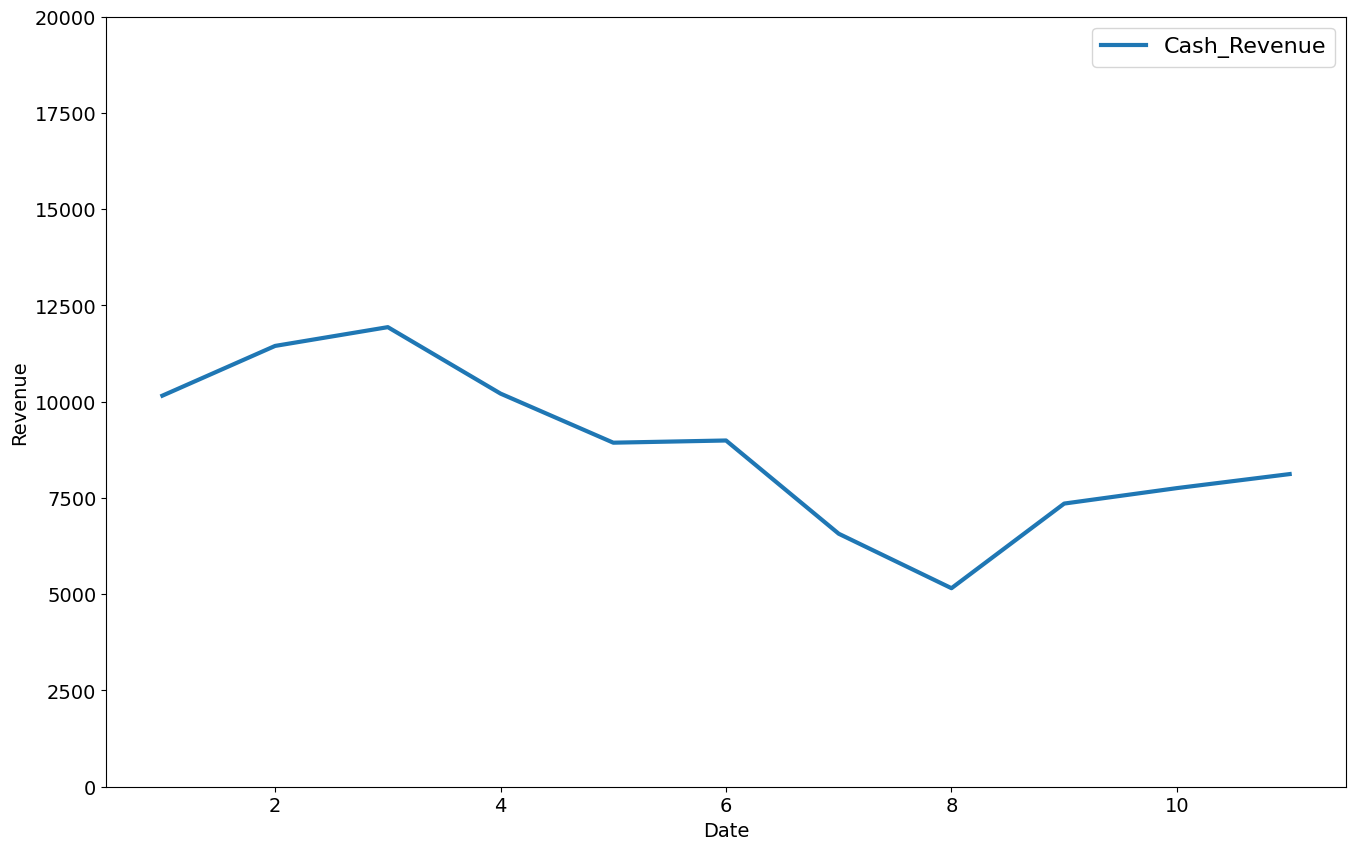

In [ ]:
# The window is number of observations that are averaged
roll_df = monthly_df.rolling(window=2).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.ylim(0, 20000)
plt.plot(roll_df.index, roll_df['Cash_Revenue'],
             linewidth=3, label=roll_df['Cash_Revenue'].name)

plt.legend(fontsize=16)

In [ ]:
revenue_bar = ptx.bar(x = monthly_df.index, # index = category name
             y = monthly_df.Cash_Revenue)

revenue_bar.show()